In [66]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

scratchdir = '/global/cscratch1/sd/chebert/'
saveDir = './../Fits/hsmFits/'

fntsize = 12
bcol = 'royalblue'
rcol = 'indianred'

In [67]:
with open('./../Fits/centerOfMassB.p', 'rb') as file:
    comDictB = pickle.load(file)
with open('./../Fits/fwhmB.p', 'rb') as file:
    fwhmDictB = pickle.load(file)

with open('./../Fits/centerOfMassA.p', 'rb') as file:
    comDictA = pickle.load(file)
with open('./../Fits/fwhmA.p', 'rb') as file:
    fwhmDictA = pickle.load(file)
    
# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 
fileNames = [f for f in fileNames if f not in ['img_a_004.fits', 'img_b_004.fits', # frames with no signal 
                                               'img_a_388.fits', 'img_b_388.fits', # frames with no signal 
                                               'img_a_389.fits', 'img_b_389.fits', # frames with no signal 
                                               'img_a_381.fits', 'img_b_381.fits', # frames with no signal 
                                               'img_a_207.fits', 'img_b_207.fits', # frames with no signal 
                                               # b frame: PSF moves suddenly by 60 pixels after 200 frames 
                                               'img_a_218.fits', 'img_b_218.fits', 
                                               'img_a_234.fits', 'img_b_234.fits']] # frames with smudges

In [68]:
critA, critB, g1_a, g2_b, g1_b, g2_a = {}, {}, {}, {}, {}, {}
hlr_a, hlr_b, x_a, x_b, y_a, y_b = {}, {}, {}, {}, {}, {}

for file in fileNames:
    fileNumber = file.split('.')[0].split('_')[-1]
    with open(saveDir + 'hsm_img_a_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmA = pickle.load(file)
    with open(saveDir + 'hsm_img_b_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmB = pickle.load(file)

    critA[fileNumber] = comDictA['img_a_' + fileNumber + '.fits'] + \
                        fwhmDictA['img_a_' + fileNumber + '.fits']
    critB[fileNumber] = comDictB['img_b_' + fileNumber + '.fits'] + \
                        fwhmDictB['img_b_' + fileNumber + '.fits']
    
    g1_a[fileNumber] = hsmA['g1']
    g1_b[fileNumber] = hsmB['g1']
    
    g2_a[fileNumber] = hsmA['g2']
    g2_b[fileNumber] = hsmB['g2']
    
    hlr_a[fileNumber] = hsmA['hlr']
    hlr_b[fileNumber] = hsmB['hlr']
    
    x_a[fileNumber] = hsmA['x']
    x_b[fileNumber] = hsmB['x']
    
    y_a[fileNumber] = hsmA['y']
    y_b[fileNumber] = hsmB['y']

In [69]:
allFits = pd.DataFrame(data={'critA': critA, 'critB': critB, 
                             'g1_a': g1_a, 'g1_b': g1_b, 
                             'g2_a': g2_a, 'g2_b': g2_b, 
                             'hlr_a': hlr_a,'hlr_b': hlr_b,
                             'x_a': x_a, 'x_b': x_b,
                             'y_a': y_a, 'y_b': y_b,
                            })

### centroid moments

In [84]:
with open('./../Fits/centroidsA.p', 'rb') as file:
    centroidDictA = pickle.load(file)
with open('./../Fits/centroidsB.p', 'rb') as file:
    centroidDictB = pickle.load(file)
    
xA = [centroidDictA[fn]['x'] for fn in centroidDictA.keys() if critA[fn] < 128 and critB[fn] < 128]
xA = np.array(xA)#[:,:100]
xB = [centroidDictB[fn]['x'] for fn in centroidDictB.keys() if critA[fn] < 128 and critB[fn] < 128]
xB = np.array(xB)#[:,:100]

yA = [centroidDictA[fn]['y'] for fn in centroidDictA.keys() if critA[fn] < 128 and critB[fn] < 128]
yA = np.array(yA)#[:,:100]
yB = [centroidDictB[fn]['y'] for fn in centroidDictB.keys() if critA[fn] < 128 and critB[fn] < 128]
yB = np.array(yB)#[:,:100]

In [145]:
n=200
cent_a_x = np.sqrt(np.sum((xA-xA.mean(axis=1)[:,None])**2, axis=1)/n)
cent_b_x = np.sqrt(np.sum((xB-xB.mean(axis=1)[:,None])**2, axis=1)/n)
cent_a_y = np.sqrt(np.sum((yA-yA.mean(axis=1)[:,None])**2, axis=1)/n)
cent_b_y = np.sqrt(np.sum((yB-yB.mean(axis=1)[:,None])**2, axis=1)/n)

In [151]:
g1A = np.array([allFits['g1_a'][fn][14] for fn in allFits['g1_a'].keys() if critA[fn] < 128 and critB[fn] < 128])
g1B = np.array([allFits['g1_b'][fn][14] for fn in allFits['g1_b'].keys() if critA[fn] < 128 and critB[fn] < 128])
maxA = np.max(np.abs(g1A))
maxB = np.max(abs(g1B))

g2A = np.array([allFits['g2_a'][fn][14] for fn in allFits['g2_a'].keys() if critA[fn] < 128 and critB[fn] < 128])
g2B = np.array([allFits['g2_b'][fn][14] for fn in allFits['g2_b'].keys() if critA[fn] < 128 and critB[fn] < 128])
maxA2 = np.max(np.abs(g2A))
maxB2 = np.max(abs(g2B))

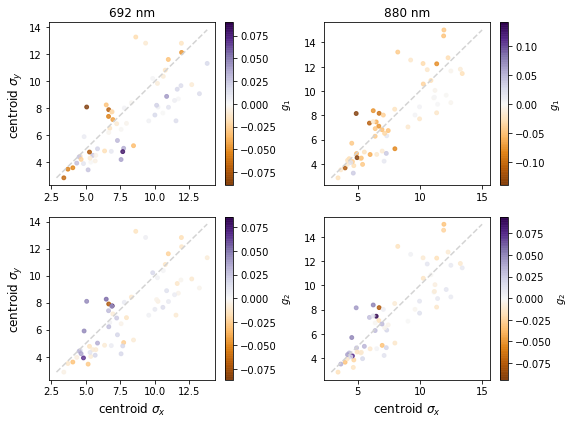

In [156]:
a_lims = [np.min([cent_a_x, cent_a_y]),np.max([cent_a_x, cent_a_y])]
b_lims = [np.min([cent_b_x, cent_b_y]),np.max([cent_b_x, cent_b_y])]

plt.figure(figsize=(8,6))
plt.subplot(221)
plt.scatter(cent_a_x, cent_a_y, alpha=0.8, s=15, c=g1A, cmap='PuOr',label='692nm', vmin=-maxA, vmax=maxA)
cb = plt.colorbar()
cb.set_label('$g_1$')
plt.plot(a_lims, a_lims, '--', color='lightgray')
plt.ylabel('centroid $\sigma_y$', fontsize=fntsize)
plt.title('692 nm')

plt.subplot(222)
plt.scatter(cent_b_x, cent_b_y, alpha=0.8, s=15, c=g1B, cmap='PuOr', label='880nm', vmin=-maxB, vmax=maxB)
cb = plt.colorbar()
cb.set_label('$g_1$')
plt.plot(b_lims, b_lims, '--', color='lightgray')
plt.title('880 nm')

plt.subplot(223)
plt.scatter(cent_a_x, cent_a_y, alpha=0.8, s=15, c=g2A, cmap='PuOr',label='692nm', vmin=-maxA2, vmax=maxA2)
cb = plt.colorbar()
cb.set_label('$g_2$')
plt.plot(a_lims, a_lims, '--', color='lightgray')
plt.xlabel('centroid $\sigma_x$', fontsize=fntsize)
plt.ylabel('centroid $\sigma_y$', fontsize=fntsize)

plt.subplot(224)
plt.scatter(cent_b_x, cent_b_y, alpha=0.8, s=15, c=g2B, cmap='PuOr', label='880nm', vmin=-maxB2, vmax=maxB2)
cb = plt.colorbar()
cb.set_label('$g_2$')
plt.plot(b_lims, b_lims, '--', color='lightgray')
plt.xlabel('centroid $\sigma_x$', fontsize=fntsize)

plt.tight_layout()
# plt.savefig('../Plots/')
plt.show()

### centroid clouds

In [ ]:
motB = np.array([[centroidDictB[i]['x'], centroidDictB[i]['y']] \
        for i in centroidDictB.keys() if allFits['critA'].loc[i] < 128 \
                and allFits['critB'].loc[fileNumber] < 128])
motA = np.array([[centroidDictA[i]['x'], centroidDictA[i]['y']] \
        for i in centroidDictA.keys() if allFits['critA'].loc[i] < 128 \
                and allFits['critB'].loc[fileNumber] < 128])

col=np.linspace(0,60,200)

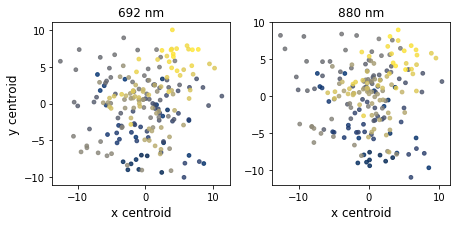

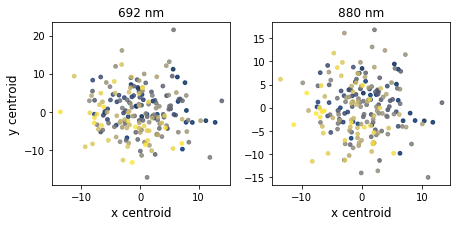

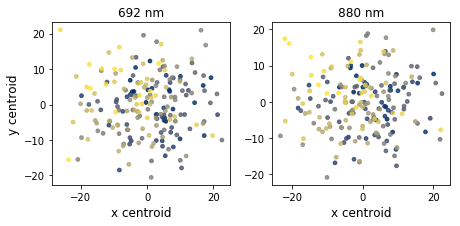

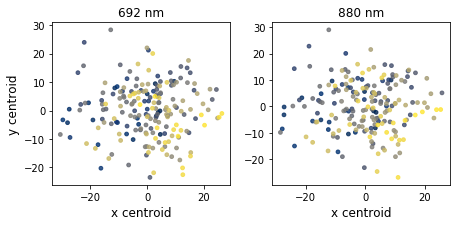

In [93]:
for i in [31,32,51,52]:
    plt.figure(figsize=(6.5,3.25))
    plt.subplot(121)
    plt.scatter(motA[i,0,:]-motA[i,0,:].mean(), motA[i,1,:]-motA[i,1,:].mean(), 
                alpha=0.8, c=col, s=14, cmap='cividis', label='692nm')
    plt.xlabel('x centroid', fontsize=fntsize)
    plt.ylabel('y centroid', fontsize=fntsize)
    plt.title('692 nm')

    plt.subplot(122)
    bx = motB[i,0,:]-motB[i,0,:].mean()
    by = motB[i,1,:]-motB[i,1,:].mean()
    plt.scatter(bx, by, alpha=0.8, s=14, c=col, cmap='cividis', label='880nm')
    plt.xlabel('x centroid', fontsize=fntsize)
    plt.title('880 nm')

    plt.tight_layout()
    plt.show()

### Do PSF parameters correlate with centroid motion?

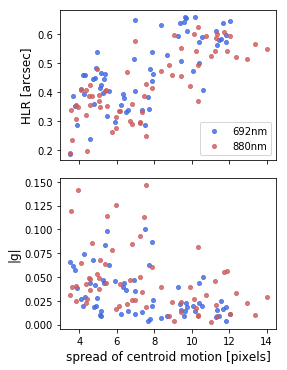

In [149]:
plt.figure(figsize=(4,5.25))
N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N, dtype=np.int32)

hlr_a = []
g1_a = []
g2_a = []

hlr_b = []
g1_b = []
g2_b = []

motB = [np.sqrt(centroidDictB[i]['x']**2+centroidDictB[i]['y']**2).std() \
        for i in centroidDictB.keys() if allFits['critA'].loc[i] < 128 \
                and allFits['critB'].loc[fileNumber] < 128]
motA = [np.sqrt(centroidDictA[i]['x']**2+centroidDictA[i]['y']**2).std() \
        for i in centroidDictA.keys() if allFits['critA'].loc[i] < 128 \
                and allFits['critB'].loc[fileNumber] < 128]

for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)
    if accepted[i]:
        hlr_a.append(allFits['hlr_a'].loc[fileNumber][14])
        g1_a.append(allFits['g1_a'].loc[fileNumber][14])
        g2_a.append(allFits['g2_a'].loc[fileNumber][14])
        
        hlr_b.append(allFits['hlr_b'].loc[fileNumber][14])
        g1_b.append(allFits['g1_b'].loc[fileNumber][14])
        g2_b.append(allFits['g2_b'].loc[fileNumber][14])
        
g1_a = np.array(g1_a)
g1_b = np.array(g1_b)
g2_a = np.array(g2_a)
g2_b = np.array(g2_b)

a = plt.subplot(211)
plt.plot(motA, hlr_a, 'o', alpha=0.8, ms=4, color=bcol, label='692nm')
plt.plot(motB, hlr_b, 'o', alpha=0.8, ms=4, color=rcol, label='880nm')
# plt.xtick([])
a.tick_params(labelbottom=False)
plt.ylabel('HLR [arcsec]', fontsize=fntsize)
plt.legend(loc=4)

plt.subplot(212)
plt.plot(motA, np.sqrt(g1_a**2+g2_a**2), 'o', ms=4, alpha=0.8, color=bcol, label='692nm')
plt.plot(motB, np.sqrt(g1_b**2+g2_b**2), 'o', ms=4, alpha=0.8, color=rcol, label='880nm')
plt.ylabel('|g|', fontsize=fntsize)
plt.xlabel('spread of centroid motion [pixels]', fontsize=fntsize)
# plt.yticks([0,.05,.1,.15],[0,.05,.1,.15])

plt.tight_layout()
# plt.savefig('../Plots/PSFparamsVcentroidSpread.png', dpi=200)
plt.show()

### centroid fourier analysis

In [132]:
freqs = np.fft.rfftfreq(n=200,d=5)
centroid_fts_xa = np.zeros((62,101))
centroid_fts_xb = np.zeros((62,101))
centroid_fts_ya = np.zeros((62,101))
centroid_fts_yb = np.zeros((62,101))

for i in range(62):
    centroid_fts_xa[i] = np.fft.rfft(xA[i])
    centroid_fts_xb[i] = np.fft.rfft(xB[i])
    centroid_fts_ya[i] = np.fft.rfft(yA[i])
    centroid_fts_yb[i] = np.fft.rfft(yB[i])

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_19-dev/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_19-dev/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_19-dev/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_19-dev/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part


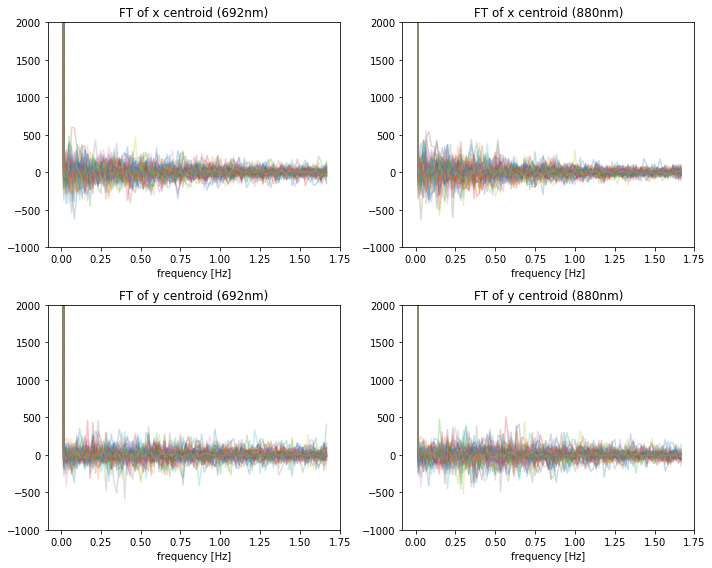

In [141]:
plt.figure(figsize=(10,8))

plt.subplot(221)
for i in range(62):
    plt.plot(freqs*50/3., centroid_fts_xa[i], alpha=0.25)
plt.ylim([-1000,2000])
plt.xlabel('frequency [Hz]')
plt.title('FT of x centroid (692nm)')

plt.subplot(222)
for i in range(62):
    plt.plot(freqs*50/3., centroid_fts_xb[i], alpha=0.25)
plt.ylim([-1000,2000])
plt.xlabel('frequency [Hz]')
plt.title('FT of x centroid (880nm)')

plt.subplot(223)
for i in range(62):
    plt.plot(freqs*50/3., centroid_fts_ya[i], alpha=0.25)
plt.ylim([-1000,2000])
plt.xlabel('frequency [Hz]')
plt.title('FT of y centroid (692nm)')

plt.subplot(224)
for i in range(62):
    plt.plot(freqs*50/3., centroid_fts_yb[i], alpha=0.25)
plt.ylim([-1000,2000])
plt.xlabel('frequency [Hz]')
plt.title('FT of y centroid (880nm)')

plt.tight_layout()
plt.show()